In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
# df = pd.read_csv("./td_role_cong_generalization_20251118_toponly.csv")
df = pd.read_csv("./td_role_cong_generalization_20251118_all.csv")
df

,src_td_prob,src_role_n_congruence,tgt_td_prob,tgt_role_n_congruence,loss,acc,sweep_id,model
0,0,0.0,0,0,0.000070,0.999990,be131vw7,copper-sweep-9
1,0,0.0,0,1,0.000006,1.000000,be131vw7,copper-sweep-9
2,0,0.0,1,0,6.921876,0.564083,be131vw7,copper-sweep-9
3,0,0.0,1,1,0.005402,0.999553,be131vw7,copper-sweep-9
4,0,0.0,0,0,0.000174,0.999930,be131vw7,dainty-sweep-6
...,...,...,...,...,...,...,...,...
291,1,1.0,1,1,0.001118,0.999553,w03izn1c,mild-sweep-1
292,1,1.0,0,0,6.552796,0.577090,w03izn1c,daily-sweep-2
293,1,1.0,0,1,0.003391,0.999690,w03izn1c,daily-sweep-2
294,1,1.0,1,0,0.002818,0.999327,w03izn1c,daily-sweep-2


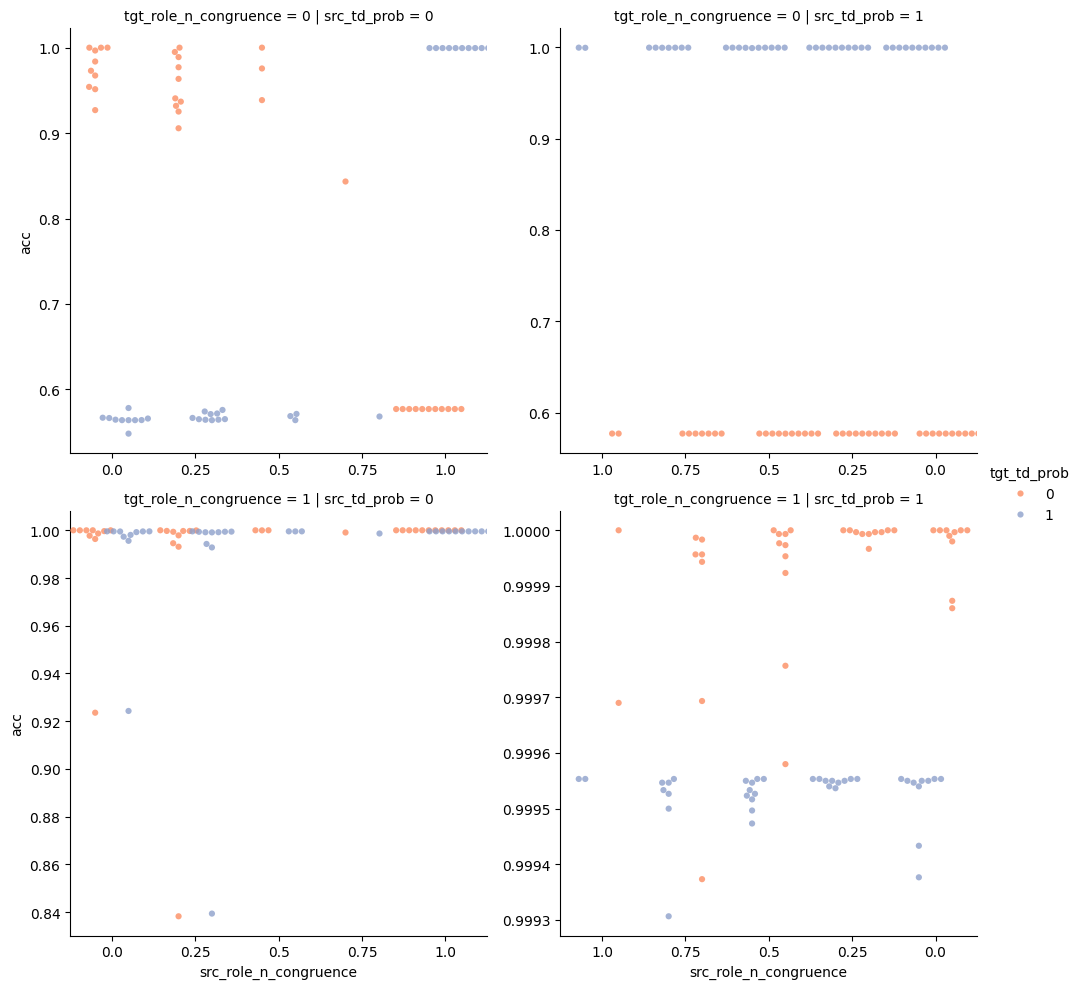

In [100]:
view = df  # df[df.tgt_role_n_congruence == 0]

g = sns.catplot(
    data=view,
    kind="swarm",
    dodge=True,
    # jitter=0.2,
    x="src_role_n_congruence",
    y="acc",
    hue="tgt_td_prob",
    col="src_td_prob",
    row="tgt_role_n_congruence",
    sharex=False,
    sharey=False,
    palette=sns.color_palette("Set2")[1:3],
    alpha=0.8,
    errorbar="sd",
    s=20,
)

# Invert the x-axis for the right-hand column
for ax in g.axes.flat:
    # ax.set_ylim(0.5, 1.05)
    if ax.get_title().endswith("src_td_prob = 1"):
        ax.invert_xaxis()


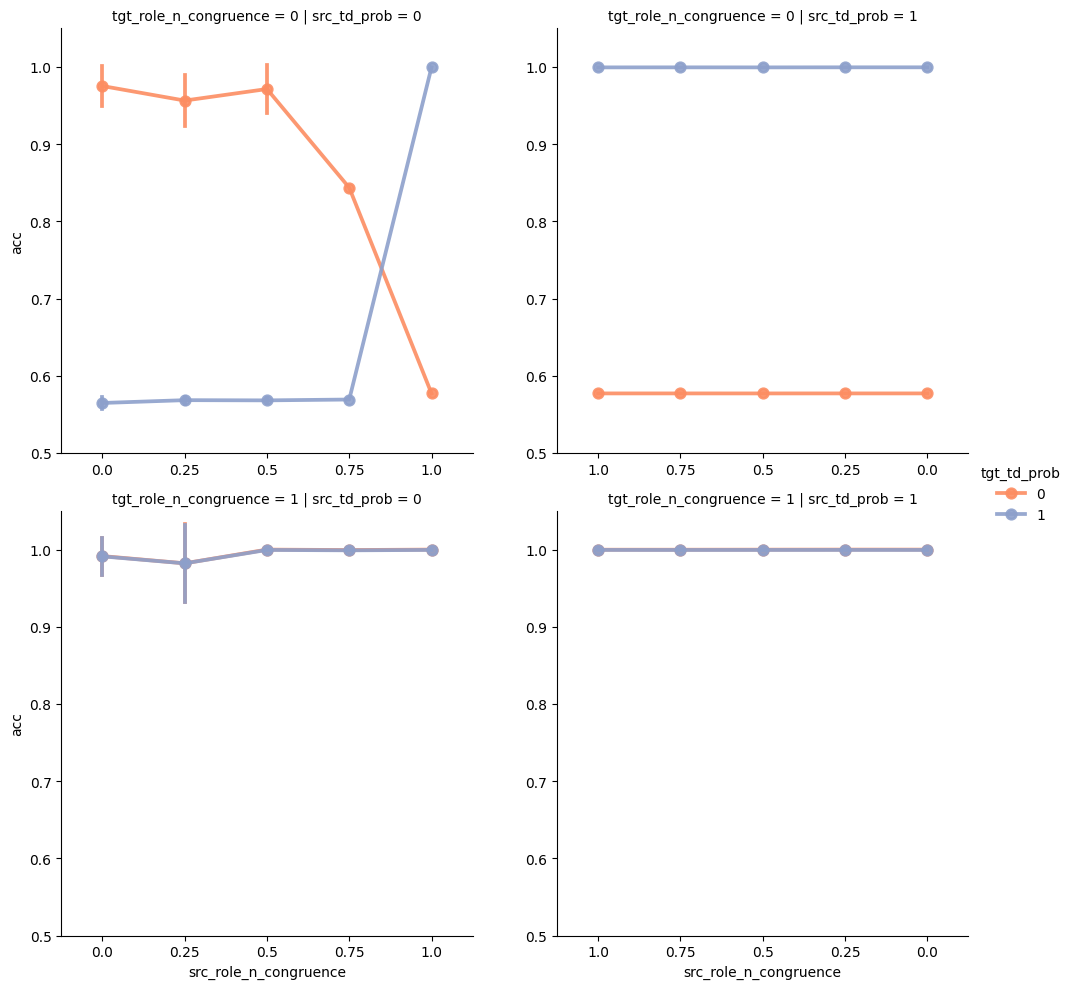

In [89]:
view = df  # df[df.tgt_role_n_congruence == 0]

g = sns.catplot(
    data=view,
    kind="point",
    x="src_role_n_congruence",
    y="acc",
    hue="tgt_td_prob",
    col="src_td_prob",
    row="tgt_role_n_congruence",
    sharex=False,
    sharey=False,
    palette=sns.color_palette("Set2")[1:3],
    alpha=0.9,
    errorbar="sd",
)

# Invert the x-axis for the right-hand column
for ax in g.axes.flat:
    ax.set_ylim(0.5, 1.05)
    if ax.get_title().endswith("src_td_prob = 1"):
        ax.invert_xaxis()
